<a href="https://colab.research.google.com/github/vasuans/Tensorflow-Projects/blob/master/CNN_using_TensorFlow2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tensorflow and other libraries**

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input,Conv2D,Dense,Flatten,Dropout
from tensorflow.keras.models import Model


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
import matplotlib.pyplot as plt

importing FashionMNIST from Tensorflow datasets

In [4]:
data = tf.keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) = data.load_data()

4423680/4422102 [==============================] - 0s 0us/step


**Normalizing data**

In [6]:
x_train,x_test = x_train/255.0,x_test/255.0

In [7]:
print(x_train.shape)

(60000, 28, 28)


**Shape need to be modified from (N,W,D) to (N,W,D,1) so that CNN can take it as input**

In [8]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


**Building model**

In [9]:
print(x_train[0].shape)

(28, 28, 1)


In [14]:
K = len(set(y_train))
print(K)

10


In [20]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32,(3,3),strides=2,activation = 'relu')(i)
x = Conv2D(64,(3,3),strides=2,activation = 'relu')(x)
x = Conv2D(128,(3,3),strides=2,activation = 'relu')(x)
x = Flatten()(x)
#x = Dropout(0.2)(x)
x = Dense(512,activation='relu')(x)
#x = Dropout(0.2)(x)
x = Dense(K,activation='softmax')(x)

In [21]:
model = Model(i,x)

In [18]:
x_train.shape

(60000, 28, 28, 1)

In [22]:
model.compile(optimizer='adam',
loss = 'sparse_categorical_crossentropy',
metrics = ['accuracy'] )
r = model.fit(x_train,y_train,validation_data= (x_test,y_test),epochs=15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4881 - accuracy: 0.8190 - val_loss: 0.3891 - val_accuracy: 0.8562
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3350 - accuracy: 0.8735 - val_loss: 0.3329 - val_accuracy: 0.8769
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2854 - accuracy: 0.8912 - val_loss: 0.3192 - val_accuracy: 0.8832
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2483 - accuracy: 0.9053 - val_loss: 0.3062 - val_accuracy: 0.8914
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2163 - accuracy: 0.9179 - val_loss: 0.3116 - val_accuracy: 0.8923
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1895 - accuracy: 0.9272 - val_loss: 0.3124 - val_accuracy: 0.8880
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1650 - accuracy: 0.9365 - val_loss: 0.3269 - val_accuracy:

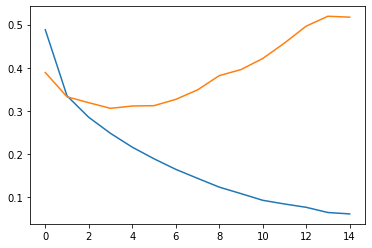

In [25]:
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')